In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

animal = pd.read_csv("../simulate/model/slow_with_linear_4.csv")

dataset = [
    ("0 Angles", pd.read_csv("../run-1-alpha-0.0-type-Angles.csv")),
    ("0.25 Angles", pd.read_csv("../run-1-alpha-0.25-type-Angles.csv")),
    ("0.5 Angles", pd.read_csv("../run-1-alpha-0.5-type-Angles.csv")),
    ("0.75 Angles", pd.read_csv("../run-1-alpha-0.75-type-Angles.csv")),
    ("1 Angles", pd.read_csv("../run-1-alpha-1.0-type-Angles.csv")),
    # ("0 DTW", pd.read_csv("../run-1-alpha-0.0-type-DTW.csv")),
    # ("0 MSE", pd.read_csv("../run-1-alpha-0.0-type-MSE.csv")),
]
for_angles = 0
for_dtw = 1
for_mse = 2

# The generation to print for generation context sensitive graphics 
target_gen = 300

### Utils
import ast
# This is taken from simulate.evaluate.calculate_angle.
def calculate_angle(p1,p2,p3):
    p1 = np.array(ast.literal_eval(p1))
    p2 = np.array(ast.literal_eval(p2))
    p3 = np.array(ast.literal_eval(p3))
    
    vec1 = p2 - p1
    vec2 = p3 - p1

    cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to avoid numerical instability
    return np.degrees(angle)

### Generate Score Over Time

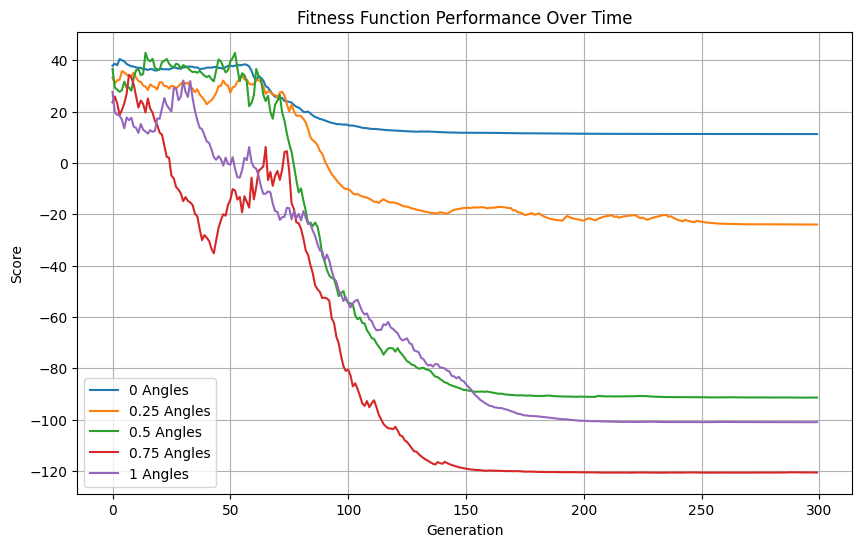

In [118]:
fig, ax = plt.subplots(figsize=(10,6))

for name, df in [(name, df[["generation", "score"]].drop_duplicates()) 
                    for name, df in dataset]:
    # Apply some smoothing over the score data
    ax.plot(df["generation"], df["score"].ewm(alpha=0.2).mean().values, label=name)

ax.set_xlabel("Generation")
ax.set_ylabel("Score")
ax.set_title("Fitness Function Performance Over Time")

ax.grid(visible=True, which="major")
ax.legend()

### Generate Relative Angle Plots Target Gen

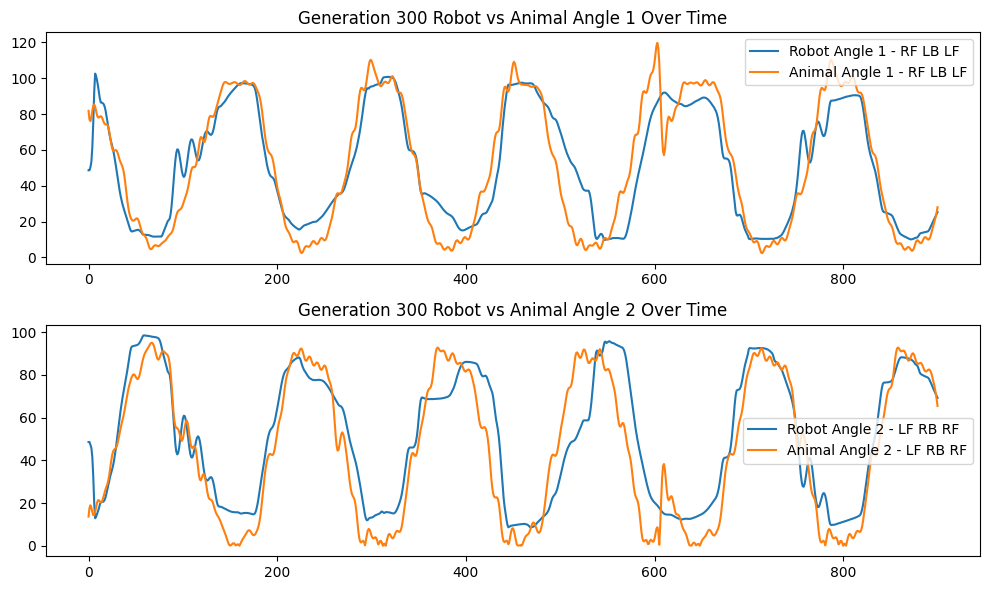

In [123]:
import copy
import matplotlib.colors as mcolors


# Make a copy of the target generation
target_set = copy.deepcopy(dataset[0][1].query(f"generation == {target_gen - 1}"))


# Generate angle data
target_set["angle1"]= target_set.apply(lambda r: 
                                       calculate_angle(
                                           r["right_front"], 
                                           r["left_hind"], 
                                           r["left_front"]
                                        ), axis=1)

target_set['angle2'] = target_set.apply(lambda r: 
                                        calculate_angle(
                                            r["left_front"], 
                                            r["right_hind"], 
                                            r["right_front"]
                                        ), axis=1)


# Generate angle data for animal
animal["angle1"] = animal.apply(lambda r:
                                calculate_angle(
                                    r["right_front"],
                                    r["left_hind"],
                                    r["left_front"]
                                ), axis=1)


animal["angle2"] = animal.apply(lambda r:
                                calculate_angle(
                                    r["left_front"],
                                    r["right_hind"],
                                    r["right_front"]
                                ), axis=1)

fig, ax = plt.subplots(2, 1, figsize=(10,6))

t_axis = np.arange(len(target_set))
_animal = animal.iloc[:len(target_set)]


ax[0].set_title(f"Generation {target_gen} Robot vs Animal Angle 1 Over Time")
ax[0].plot(t_axis, target_set['angle1'], label="Robot Angle 1 - RF LB LF")
ax[0].plot(t_axis, _animal['angle1'], label="Animal Angle 1 - RF LB LF")
ax[0].legend()

ax[1].set_title(f"Generation {target_gen} Robot vs Animal Angle 2 Over Time")
ax[1].plot(t_axis, target_set['angle2'], label="Robot Angle 2 - LF RB RF")
ax[1].plot(t_axis, _animal['angle2'], label="Animal Angle 2 - LF RB RF")
ax[1].legend()

plt.tight_layout()
plt.show()


### Generate Angle Accuracy Over Time

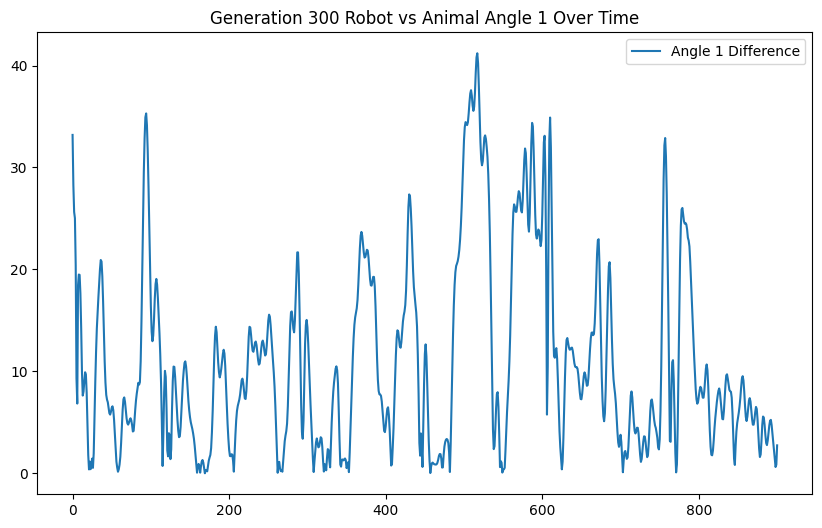

In [127]:
import ast
import copy
import matplotlib.colors as mcolors

# Make a copy of the target generation
target_set = copy.deepcopy(dataset[for_angles][1].query(f"generation == {target_gen - 1}"))


# Generate angle data
target_set["angle1"]= target_set.apply(lambda r: 
                                       calculate_angle(
                                           r["right_front"], 
                                           r["left_hind"], 
                                           r["left_front"]
                                        ), axis=1)

target_set['angle2'] = target_set.apply(lambda r: 
                                        calculate_angle(
                                            r["left_front"], 
                                            r["right_hind"], 
                                            r["right_front"]
                                        ), axis=1)


# Generate angle data for animal
animal["angle1"] = animal.apply(lambda r:
                                calculate_angle(
                                    r["right_front"],
                                    r["left_hind"],
                                    r["left_front"]
                                ), axis=1)


animal["angle2"] = animal.apply(lambda r:
                                calculate_angle(
                                    r["left_front"],
                                    r["right_hind"],
                                    r["right_front"]
                                ), axis=1)


fig, ax = plt.subplots(figsize=(10,6))

t_axis = np.arange(len(target_set))
_animal = animal.iloc[:len(target_set)]

_animal = _animal.reset_index(drop=True)
target_set = target_set.reset_index(drop=True)
angle1_diff = abs(target_set["angle1"] - _animal["angle1"])
# angle2_diff = target_set["angle2"] - _animal["angle2"]

ax.set_title(f"Generation {target_gen} Robot vs Animal Angle 1 Over Time")
ax.plot(t_axis, angle1_diff, label="Angle 1 Difference")
# ax.plot(t_axis, angle2_diff, label="Angle 2 Difference")
ax.legend()


plt.show()